# Analisis Kesenjangan Sosio-Ekonomi di Jawa Barat
**Proyek Capstone untuk Menggali Wawasan Pembangunan Regional dengan Bantuan AI**
---

### 1. Tinjauan Proyek

Proyek ini bertujuan untuk menganalisis dan memvisualisasikan kesenjangan sosio-ekonomi di 27 kabupaten/kota di Provinsi Jawa Barat. Dengan menggunakan data publik dari tahun 2020-2022, kita akan mengeksplorasi tiga indikator kunci:
1.  **Indeks Pembangunan Manusia (IPM)**: Mengukur kualitas hidup.
2.  **Tingkat Kemiskinan (%)**: Mengukur proporsi penduduk miskin.
3.  **Rasio Gini**: Mengukur ketimpangan pengeluaran.

Melalui analisis klaster, kita akan mengidentifikasi kelompok-kelompok daerah (arketipe regional) dengan karakteristik serupa. Wawasan dari analisis ini akan digunakan untuk merumuskan rekomendasi kebijakan yang bertarget dan berbasis data. Proyek ini juga akan mendemonstrasikan bagaimana model AI seperti IBM Granite dapat berfungsi sebagai *co-pilot* untuk mempercepat dan memperdalam analisis."


### 2. Persiapan Lingkungan

Langkah pertama adalah menginstal dan mengimpor semua pustaka Python yang diperlukan untuk analisis data, visualisasi, dan machine learning."


In [ ]:
# Instal pustaka yang mungkin belum ada di lingkungan Colab
!pip install pandas plotly scikit-learn seaborn replicate --quiet
# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
import replicate
from google.colab import userdata
# Pengaturan untuk visualisasi yang lebih baik
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.1 MB/s eta 0:00:00


### 3. Akuisisi dan Pemuatan Data
Kita akan memuat tiga dataset terpisah yang berisi data IPM, Kemiskinan, dan Rasio Gini untuk setiap kabupaten/kota di Jawa Barat. Pastikan Anda telah mengunggah file `ipm_jawa_barat.csv`, `kemiskinan_jawa_barat.csv`, dan `gini_jawa_barat.csv` ke sesi Colab ini."


In [ ]:
# Muat dataset dari file CSV
try:
    df_ipm = pd.read_csv('ipm_jawa_barat.csv')
    df_kemiskinan = pd.read_csv('kemiskinan_jawa_barat.csv')
    df_gini = pd.read_csv('gini_jawa_barat.csv')

    print("Dataset IPM:")
    print(df_ipm.head())
    print("\nDataset Kemiskinan:")
    print(df_kemiskinan.head())
    print("\nDataset Rasio Gini:")
    print(df_gini.head())

except FileNotFoundError:
    print("Error: Pastikan file CSV sudah diunggah ke Google Colab.")

Dataset IPM:
   kode_kabupaten_kota nama_kabupaten_kota  tahun    ipm
0                 3201     KABUPATEN BOGOR   2020  70.68
1                 3201     KABUPATEN BOGOR   2021  71.20
2                 3201     KABUPATEN BOGOR   2022  71.64
3                 3202  KABUPATEN SUKABUMI   2020  67.33
4                 3202  KABUPATEN SUKABUMI   2021  67.74

Dataset Kemiskinan:
   kode_kabupaten_kota nama_kabupaten_kota  tahun  persentase_penduduk_miskin
0                 3201     KABUPATEN BOGOR   2020                        7.69
1                 3201     KABUPATEN BOGOR   2021                        8.13
2                 3201     KABUPATEN BOGOR   2022                        7.99
3                 3202  KABUPATEN SUKABUMI   2020                        7.32
4                 3202  KABUPATEN SUKABUMI   2021                        7.98

Dataset Rasio Gini:
   kode_kabupaten_kota nama_kabupaten_kota  tahun  rasio_gini
0                 3201     KABUPATEN BOGOR   2020       0.407
1          

### 4. Persiapan dan Pra-pemrosesan Data
Data mentah dari berbagai sumber perlu digabungkan, dibersihkan, dan ditransformasi agar siap untuk dianalisis.

1.  **Konsolidasi**: Menggabungkan tiga DataFrame menjadi satu DataFrame analitis.
2.  **Pembersihan**: Memeriksa nilai yang hilang dan memastikan tipe data sudah benar.
3.  **Rekayasa Fitur**: Menghitung nilai rata-rata untuk setiap indikator selama periode 2020-2022 untuk mendapatkan gambaran yang stabil dari setiap daerah.


In [ ]:
# Menggabungkan dataset menjadi satu DataFrame
df_merged = pd.merge(df_ipm, df_kemiskinan, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'])
df_final = pd.merge(df_merged, df_gini, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'])

print("Data setelah digabungkan:")
print(df_final.head())

# Memeriksa informasi dan nilai yang hilang
print("\nInformasi DataFrame:")
df_final.info()

# Rekayasa Fitur: Menghitung rata-rata untuk periode analisis
df_avg = df_final.groupby(['kode_kabupaten_kota', 'nama_kabupaten_kota']).agg(
    avg_ipm=('ipm', 'mean'),
    avg_kemiskinan=('persentase_penduduk_miskin', 'mean'),
    avg_gini=('rasio_gini', 'mean')
).reset_index()

print("\nData rata-rata per daerah (2020-2022):")
print(df_avg.head())

Data setelah digabungkan:
   kode_kabupaten_kota nama_kabupaten_kota  tahun    ipm  \
0                 3201     KABUPATEN BOGOR   2020  70.68   
1                 3201     KABUPATEN BOGOR   2021  71.20   
2                 3201     KABUPATEN BOGOR   2022  71.64   
3                 3202  KABUPATEN SUKABUMI   2020  67.33   
4                 3202  KABUPATEN SUKABUMI   2021  67.74   

   persentase_penduduk_miskin  rasio_gini  
0                        7.69       0.407  
1                        8.13       0.413  
2                        7.99       0.409  
3                        7.32       0.368  
4                        7.98       0.370  

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kode_kabupaten_kota         81 non-null     int64  
 1   nama_kabupaten_kota         81 non-null     objec

### 5. Analisis Data Eksploratif (EDA)
Pada tahap ini, kita akan \"merasakan\" data melalui statistik deskriptif dan visualisasi untuk memahami distribusi dan hubungan awal antar variabel.


In [ ]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk Rata-Rata Indikator:")
print(df_avg[['avg_ipm', 'avg_kemiskinan', 'avg_gini']].describe())

Statistik Deskriptif untuk Rata-Rata Indikator:
         avg_ipm  avg_kemiskinan   avg_gini
count  27.000000       27.000000  27.000000
mean   72.678765        8.507407   0.377556
std     4.760438        2.687292   0.031168
min    66.156667        2.523333   0.320000
25%    69.030000        6.905000   0.354000
50%    71.676667        8.993333   0.372000
75%    75.675000       10.345000   0.400333
max    82.503333       12.920000   0.441667


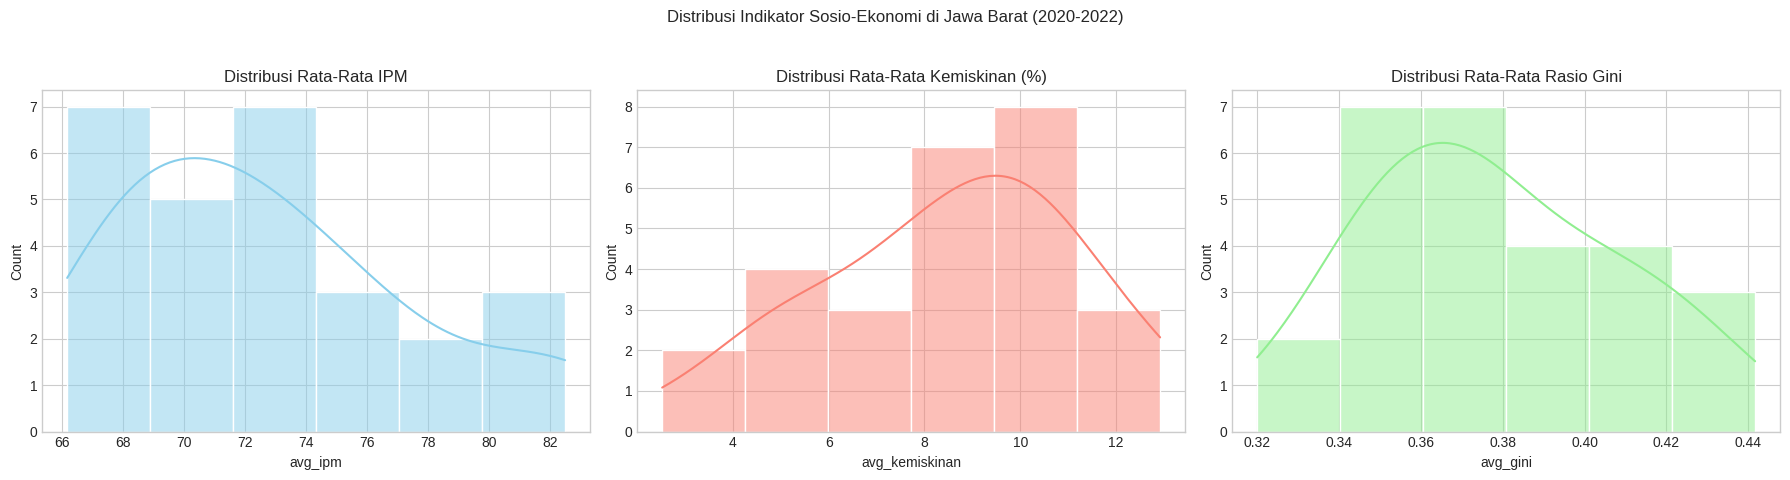

In [ ]:
# Visualisasi Distribusi Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribusi Indikator Sosio-Ekonomi di Jawa Barat (2020-2022)')

sns.histplot(df_avg['avg_ipm'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Rata-Rata IPM')

sns.histplot(df_avg['avg_kemiskinan'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Rata-Rata Kemiskinan (%)')

sns.histplot(df_avg['avg_gini'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribusi Rata-Rata Rasio Gini')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 6. Analisis Korelasi
Kita akan menghitung matriks korelasi untuk mengukur secara kuantitatif kekuatan dan arah hubungan linear antara IPM, Kemiskinan, dan Rasio Gini.


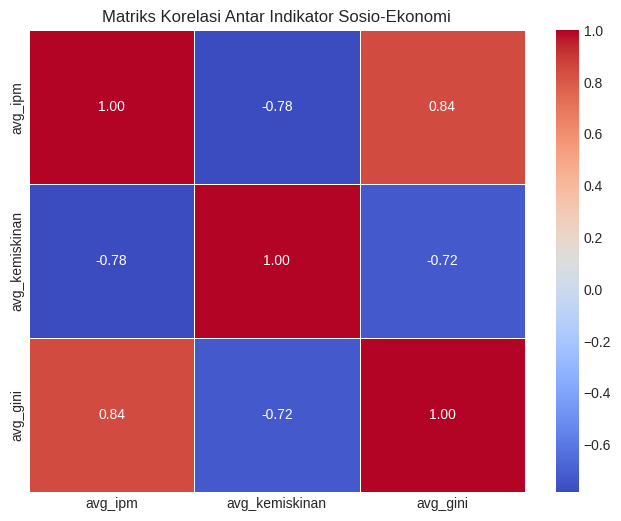

Insight dari Korelasi:
1. IPM vs Kemiskinan: Korelasi negatif kuat. Daerah dengan IPM tinggi cenderung memiliki tingkat kemiskinan rendah.
2. IPM vs Rasio Gini: Korelasi positif kuat. Ini adalah 'konundrum pembangunan' di mana daerah paling maju juga cenderung paling timpang.
3. Kemiskinan vs Rasio Gini: Korelasi negatif sedang. Daerah miskin cenderung lebih 'setara dalam kemiskinan'.


In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df_avg[['avg_ipm', 'avg_kemiskinan', 'avg_gini']].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi Antar Indikator Sosio-Ekonomi')
plt.show()

print("Insight dari Korelasi:")
print("1. IPM vs Kemiskinan: Korelasi negatif kuat. Daerah dengan IPM tinggi cenderung memiliki tingkat kemiskinan rendah.")
print("2. IPM vs Rasio Gini: Korelasi positif kuat. Ini adalah 'konundrum pembangunan' di mana daerah paling maju juga cenderung paling timpang.")
print("3. Kemiskinan vs Rasio Gini: Korelasi negatif sedang. Daerah miskin cenderung lebih 'setara dalam kemiskinan'.")

### 7. Analisis Klaster (K-Means Clustering)
  Inti dari analisis ini adalah mengelompokkan 27 daerah ke dalam beberapa klaster (arketipe) berdasarkan profil sosio-ekonomi mereka. Ini adalah pendekatan *unsupervised machine learning* yang akan membantu kita mengidentifikasi pola secara objektif.


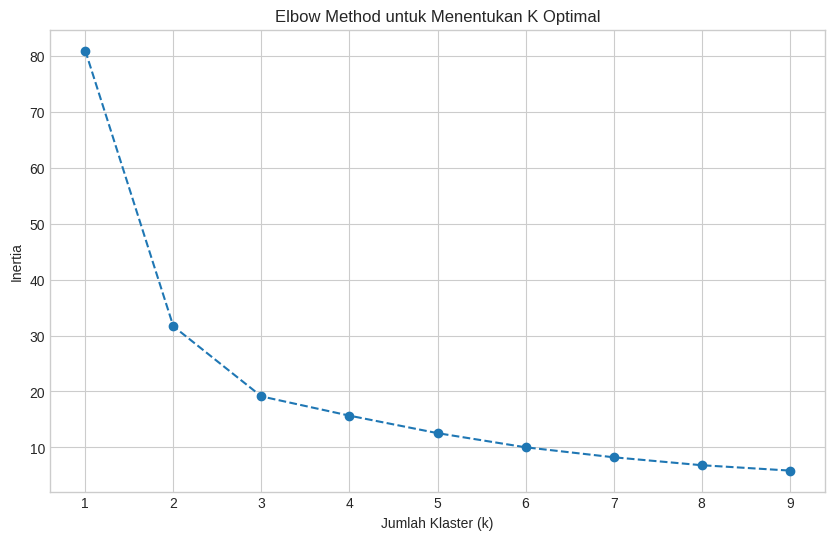

In [ ]:
# Memilih fitur untuk clustering dan melakukan standarisasi
features = df_avg[['avg_ipm', 'avg_kemiskinan', 'avg_gini']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah klaster optimal dengan Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xticks(k_range)
plt.show()

"Berdasarkan plot \"siku\" di atas, jumlah klaster optimal tampaknya adalah **4**. Mari kita terapkan K-Means dengan k=4."

In [ ]:
# Melatih model K-Means dengan k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_avg['cluster'] = kmeans.fit_predict(scaled_features)

print("Data dengan label klaster:")
print(df_avg.head())

Data dengan label klaster:
   kode_kabupaten_kota nama_kabupaten_kota    avg_ipm  avg_kemiskinan  \
0                 3201     KABUPATEN BOGOR  71.173333        7.936667   
1                 3202  KABUPATEN SUKABUMI  67.796667        7.493333   
2                 3203   KABUPATEN CIANJUR  66.156667       10.730000   
3                 3204   KABUPATEN BANDUNG  73.120000        6.983333   
4                 3205     KABUPATEN GARUT  67.343333       10.080000   

   avg_gini  cluster  
0  0.409667        1  
1  0.367667        0  
2  0.370667        2  
3  0.376000        0  
4  0.342333        2  


#### Menganalisis dan Memvisualisasikan Klaster

Sekarang kita akan menganalisis karakteristik rata-rata dari setiap klaster untuk memberikan nama dan profil pada setiap arketipe.

In [ ]:
# Menganalisis pusat klaster
cluster_profile = df_avg.groupby('cluster')[['avg_ipm', 'avg_kemiskinan', 'avg_gini']].mean().reset_index()
print("Profil Rata-Rata Setiap Klaster:")
print(cluster_profile)

# Visualisasi klaster
fig = px.scatter_3d(df_avg,
                    x='avg_ipm',
                    y='avg_kemiskinan',
                    z='avg_gini',
                    color='cluster',
                    hover_name='nama_kabupaten_kota',
                    title='Visualisasi 3D Klaster Sosio-Ekonomi Jawa Barat',
                    labels={'avg_ipm': 'IPM', 'avg_kemiskinan': 'Kemiskinan (%)', 'avg_gini': 'Rasio Gini'})
fig.show()

Profil Rata-Rata Setiap Klaster:
   cluster    avg_ipm  avg_kemiskinan  avg_gini
0        0  71.543889        7.602222  0.367056
1        1  75.399524        7.385238  0.403286
2        2  68.953333       10.989091  0.352576
3        3  82.260000        3.836667  0.430111


### 8. Insight & Temuan: Mengidentifikasi Arketipe Regional
Berdasarkan profil klaster, kita dapat mendefinisikan empat arketipe regional yang berbeda di Jawa Barat. (Catatan: Penamaan dan nomor klaster bisa berbeda setiap kali dijalankan, namun polanya akan serupa).
* **Arketipe 1: \"Mesin Metropolitan\"**
  * **Profil**: IPM sangat tinggi, kemiskinan sangat rendah, namun Rasio Gini **tertinggi**.
  * **Contoh Daerah**: Kota Bandung, Kota Bekasi, Kota Depok.
  * **Tantangan**: Mengelola ketidaksetaraan dan memastikan pertumbuhan yang inklusif.

* **Arketipe 2: \"Koridor Industri Berkembang\"**
  * **Profil**: IPM tinggi, kemiskinan moderat, dan Rasio Gini tinggi.
  * **Contoh Daerah**: Kab. Bekasi, Kab. Karawang.
  * **Tantangan**: Menghubungkan pertumbuhan industri dengan kesejahteraan masyarakat lokal.

* **Arketipe 3: \"Daerah Agraris Stabil\"**
  * **Profil**: IPM dan kemiskinan moderat, dengan Rasio Gini **paling rendah**.
  * **Contoh Daerah**: Kab. Ciamis, Kab. Kuningan.
  * **Tantangan**: Modernisasi dan diversifikasi ekonomi untuk meningkatkan standar hidup.
* **Arketipe 4: \"Zona Pembangunan Prioritas\"**
  * **Profil**: IPM **terendah**, kemiskinan **tertinggi**.\n",
  * **Contoh Daerah**: Kab. Cianjur, Kab. Indramayu.\n",
  * **Tantangan**: Investasi fundamental pada modal manusia dan infrastruktur dasar."

### 9. Penjelasan Dukungan AI (IBM Granite)
Model AI seperti IBM Granite dapat diintegrasikan untuk memperkuat analisis dalam beberapa cara. Di bawah ini adalah contoh bagaimana kita bisa menggunakan AI sebagai *co-pilot*.
**Penting:** Sebelum menjalankan sel berikutnya, pastikan Anda telah menyimpan token API Replicate Anda di Google Colab. Caranya:
1. Klik ikon kunci (🔑) di panel sebelah kiri Colab.
2. Klik `+ Add a new secret`.
3. Untuk **Name**, masukkan `REPLICATE_API_TOKEN`.
4. Untuk **Value**, tempel (paste) token API Anda dari Replicate.
5. Aktifkan sakelar (toggle) `Notebook access` agar sel kode dapat membacanya.


In [ ]:
# Muat API Token dari Colab Secrets dan atur sebagai environment variable
try:
  REPLICATE_API_TOKEN = userdata.get('api_token')
  os.environ['REPLICATE_API_TOKEN'] = REPLICATE_API_TOKEN
  print("Token API Replicate berhasil dimuat.")
except Exception as e:
  print(f"Error: Gagal memuat token API. Pastikan Anda sudah menyimpannya di Colab Secrets dengan nama 'REPLICATE_API_TOKEN'.")


Token API Replicate berhasil dimuat.


In [ ]:
from IPython.display import Markdown

def call_llm_api(prompt):
    """Fungsi untuk memanggil API model IBM Granite di Replicate."""
    print(f"--- PROMPT DIKIRIM KE AI ---{prompt}")

    # Pastikan token sudah ada
    if 'REPLICATE_API_TOKEN' not in os.environ or not os.environ['REPLICATE_API_TOKEN']:
        return "Error: REPLICATE_API_TOKEN tidak ditemukan. Harap atur di Colab Secrets."

    try:
        # Menjalankan model di Replicate
        output = replicate.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={
                "prompt": prompt,
                "max_new_tokens": 512 # Batasi panjang output agar tidak terlalu lama
            }
        )

        # Menggabungkan hasil output yang mungkin bersifat streaming
        full_response = "".join(list(output))
        return full_response
    except Exception as e:
        return f"Terjadi error saat memanggil API Replicate: {e}"

# Contoh 1: AI untuk Generasi Hipotesis
# Catatan: Menjalankan sel ini akan menggunakan token API Anda dan membutuhkan waktu beberapa saat.
prompt_hipotesis = ("""
You are an expert development economist. I am analyzing socioeconomic data for West Java, Indonesia. My findings show that urban areas with a very high Human Development Index (HDI) also have a very high Gini Ratio (inequality). Based on development economics theories, provide three plausible hypotheses that could explain this phenomenon.
""")
respons_hipotesis = call_llm_api(prompt_hipotesis)
print("--- RESPONS DARI AI ---")
print(respons_hipotesis)

# Contoh 2: AI untuk Meringkas Data Kualitatif
# Catatan: Menjalankan sel ini akan menggunakan token API Anda.
prompt_ringkasan = ("""
Summarize the following texts about the economy of Indramayu Regency, focusing on its main challenges and stated development priorities. The text is in Indonesian.\n\nText: 'Indramayu dikenal sebagai lumbung padi nasional, namun kesejahteraan petaninya masih rendah karena masalah irigasi dan fluktuasi harga. Selain itu, Indramayu adalah salah satu pemasok tenaga kerja migran terbesar di Indonesia, yang mengindikasikan kurangnya lapangan pekerjaan formal yang menarik di dalam daerah. Pemerintah daerah berfokus pada program modernisasi pertanian dan pengembangan kawasan industri baru untuk menyerap tenaga kerja lokal.'
""")
respons_ringkasan = call_llm_api(prompt_ringkasan)
print("\n--- RESPONS DARI AI ---")
print(respons_ringkasan)

Markdown(respons_hipotesis)
Markdown(respons_ringkasan)

--- PROMPT DIKIRIM KE AI ---
You are an expert development economist. I am analyzing socioeconomic data for West Java, Indonesia. My findings show that urban areas with a very high Human Development Index (HDI) also have a very high Gini Ratio (inequality). Based on development economics theories, provide three plausible hypotheses that could explain this phenomenon.

--- RESPONS DARI AI ---
1. **Concentration of Wealth and Opportunities**: High HDI scores in urban areas typically indicate a high standard of living, good health, and education levels. However, these benefits might not be evenly distributed. The hypothesis could be that while the average HDI is very high, a significant portion of the population might still experience poverty or lower-quality services due to spatial segregation or gentrification. This uneven access to opportunities could lead to a high Gini Ratio, as wealth becomes concentrated among a smaller, affluent segment of society, while others remain disadvantage

Indramayu, known as the nation's rice granary, faces economic challenges primarily due to irrigation issues and volatile rice prices. Additionally, it is one of Indonesia's major suppliers of migrant labor, indicating a lack of formal job opportunities within the region. The local government prioritizes agricultural modernization programs and the development of new industrial areas to absorb the local workforce.

Main challenges:
1. Irrigation problems
2. Price volatility of rice
3. Limited formal job opportunities, leading to a reliance on migrant labor supply

Development priorities:
1. Modernization of agriculture
2. Establishment of new industrial areas to create local employment

These priorities aim to address the existing economic challenges by enhancing agricultural productivity and creating diverse employment opportunities beyond traditional farming.

### 10. Kesimpulan & Rekomendasi Kebijakan
  Analisis ini menunjukkan bahwa kebijakan pembangunan \"satu ukuran untuk semua\" tidak efektif untuk Jawa Barat. Diperlukan pendekatan yang terdiferensiasi berdasarkan arketipe regional.

  #### Rekomendasi untuk \"Mesin Metropolitan\"
  * **Fokus**: Inklusivitas dan pengelolaan ketidaksetaraan.
  * **Kebijakan**: Pajak properti progresif, investasi transportasi publik massal yang terjangkau, dan program perumahan rakyat vertikal (rusunawa).  
  #### Rekomendasi untuk \"Koridor Industri Berkembang\"
  * **Fokus**: Menjembatani industri dengan masyarakat lokal.
  * **Kebijakan**: Program kemitraan wajib antara industri besar dan UMKM lokal, dana pengembangan keterampilan yang dikelola bersama industri, dan pengawasan sosial-lingkungan yang ketat.
  #### Rekomendasi untuk \"Daerah Agraris Stabil\"
  * **Fokus**: Modernisasi dan diversifikasi ekonomi.
  * **Kebijakan**: Subsidi adopsi agroteknologi, investasi infrastruktur pasca-panen (rantai dingin), dan inkubasi pariwisata berbasis komunitas.
  #### Rekomendasi untuk \"Zona Pembangunan Prioritas\
  * **Fokus**: Investasi fundamental pada modal manusia.
  * **Kebijakan**: Program \"Kejar IPM\" yang masif di bidang pendidikan dasar dan kesehatan, rehabilitasi infrastruktur dasar (jalan desa, air bersih), dan program bantuan tunai bersyarat yang diperkuat.